In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
df = pd.read_csv('datasit task1.csv', sep=';')

In [ ]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.97971935,17,3.0,50.36565595,20.860773,1,0
1,4326,Arts,27.80263951,1,5.0,62.61596979,65.632415,1,0
2,5849,Arts,86.8204847,14,2.0,78.4589624,63.812007,1,1
3,4992,Science,35.03842663,17,10.0,59.19885273,95.433162,0,1
4,3866,Programming,92.49064696,16,0.0,98.428285,18.102478,0,0


In [ ]:
print("\nMissing values per column:")
df.isna().sum()


Missing values per column:


UserID                   0
CourseCategory           6
TimeSpentOnCourse        7
NumberOfVideosWatched    6
NumberOfQuizzesTaken     0
QuizScores               7
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
#تأكيد تعويض القيم الفارغة يدويًا لبعض الأعمدة
df['TimeSpentOnCourse'] = df['TimeSpentOnCourse'].fillna(df['TimeSpentOnCourse'].median())
df['NumberOfVideosWatched'] = df['NumberOfVideosWatched'].fillna(df['NumberOfVideosWatched'].median())
df['QuizScores'] = df['QuizScores'].fillna(df['QuizScores'].median())

In [ ]:
print(df.isna().sum())

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64


In [ ]:
# حذف الصفوف المكررة
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
duplicates_removed = initial_rows - df.shape[0]
print(f"\nDuplicates removed: {duplicates_removed}")


Duplicates removed: 0


In [ ]:
# تحليل توازن الفئات (Class Balance)
target_col = 'CourseCompletion'

if target_col in df.columns:
    print(f"\nClass distribution in '{target_col}':")
    print(df[target_col].value_counts(normalize=True))


Class distribution in 'CourseCompletion':
CourseCompletion
0    0.560903
1    0.439097
Name: proportion, dtype: float64


In [ ]:
# وصف البيانات
# 1. عرض معلومات عامة عن البيانات
print("General info about the dataset:")
print(df.info())

General info about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 8103 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 8103 non-null   int64  
 1   CourseCategory         8103 non-null   object 
 2   TimeSpentOnCourse      8103 non-null   float64
 3   NumberOfVideosWatched  8103 non-null   float64
 4   NumberOfQuizzesTaken   8103 non-null   float64
 5   QuizScores             8103 non-null   float64
 6   CompletionRate         8103 non-null   float64
 7   DeviceType             8103 non-null   int64  
 8   CourseCompletion       8103 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 633.0+ KB
None


In [ ]:
# 2. عرض إحصائيات وصفية لكل الأعمدة الرقمية والنصية
print("\nDescriptive statistics for numeric columns:")
print(df.describe())
print("\nDescriptive statistics for categorical/object columns:")
print(df.describe(include=['object']))


Descriptive statistics for numeric columns:
            UserID  TimeSpentOnCourse  NumberOfVideosWatched  \
count  8103.000000        8103.000000            8103.000000   
mean   4503.883870          50.671146              10.145625   
std    2604.045499          29.258141               5.989192   
min       1.000000           1.005230               0.000000   
25%    2247.500000          26.114631               5.000000   
50%    4491.000000          50.299654              10.000000   
75%    6765.500000          75.369863              15.000000   
max    9000.000000         700.048665              20.000000   

       NumberOfQuizzesTaken   QuizScores  CompletionRate   DeviceType  \
count           8103.000000  8103.000000     8103.000000  8103.000000   
mean               5.167099    75.099240       51.182468     0.500185   
std                3.131917    14.337754       29.076595     0.500031   
min                0.000000    50.005119        0.009327     0.000000   
25%          

In [ ]:
# 3. إحصائيات وصفية حسب تصنيف المستخدم (مكتمل / غير مكتمل)
target_col = 'CourseCompletion'
if target_col in df.columns:
    print(f"\nDescriptive statistics grouped by '{target_col}':")
    print(df.groupby(target_col).describe())


Descriptive statistics grouped by 'CourseCompletion':
                  UserID                                                  \
                   count         mean          std  min      25%     50%   
CourseCompletion                                                           
0                 4545.0  4455.611441  2556.703112  3.0  2255.00  4450.0   
1                 3558.0  4565.547218  2662.385277  1.0  2233.75  4539.0   

                                  TimeSpentOnCourse             ...  \
                      75%     max             count       mean  ...   
CourseCompletion                                                ...   
0                 6664.00  9000.0            4545.0  45.915688  ...   
1                 6905.25  8998.0            3558.0  56.745783  ...   

                 CompletionRate            DeviceType                      \
                            75%        max      count      mean       std   
CourseCompletion                                      

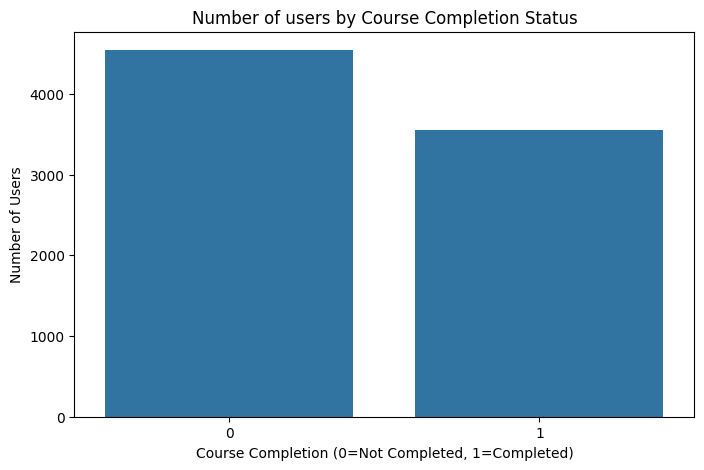

In [ ]:
# 4. رسم بياني يوضح عدد المستخدمين المكتملين وغير المكتملين (عدد الدورات)
plt.figure(figsize=(8,5))
sns.countplot(data=df, x=target_col)
plt.title('Number of users by Course Completion Status')
plt.xlabel('Course Completion (0=Not Completed, 1=Completed)')
plt.ylabel('Number of Users')
plt.show()

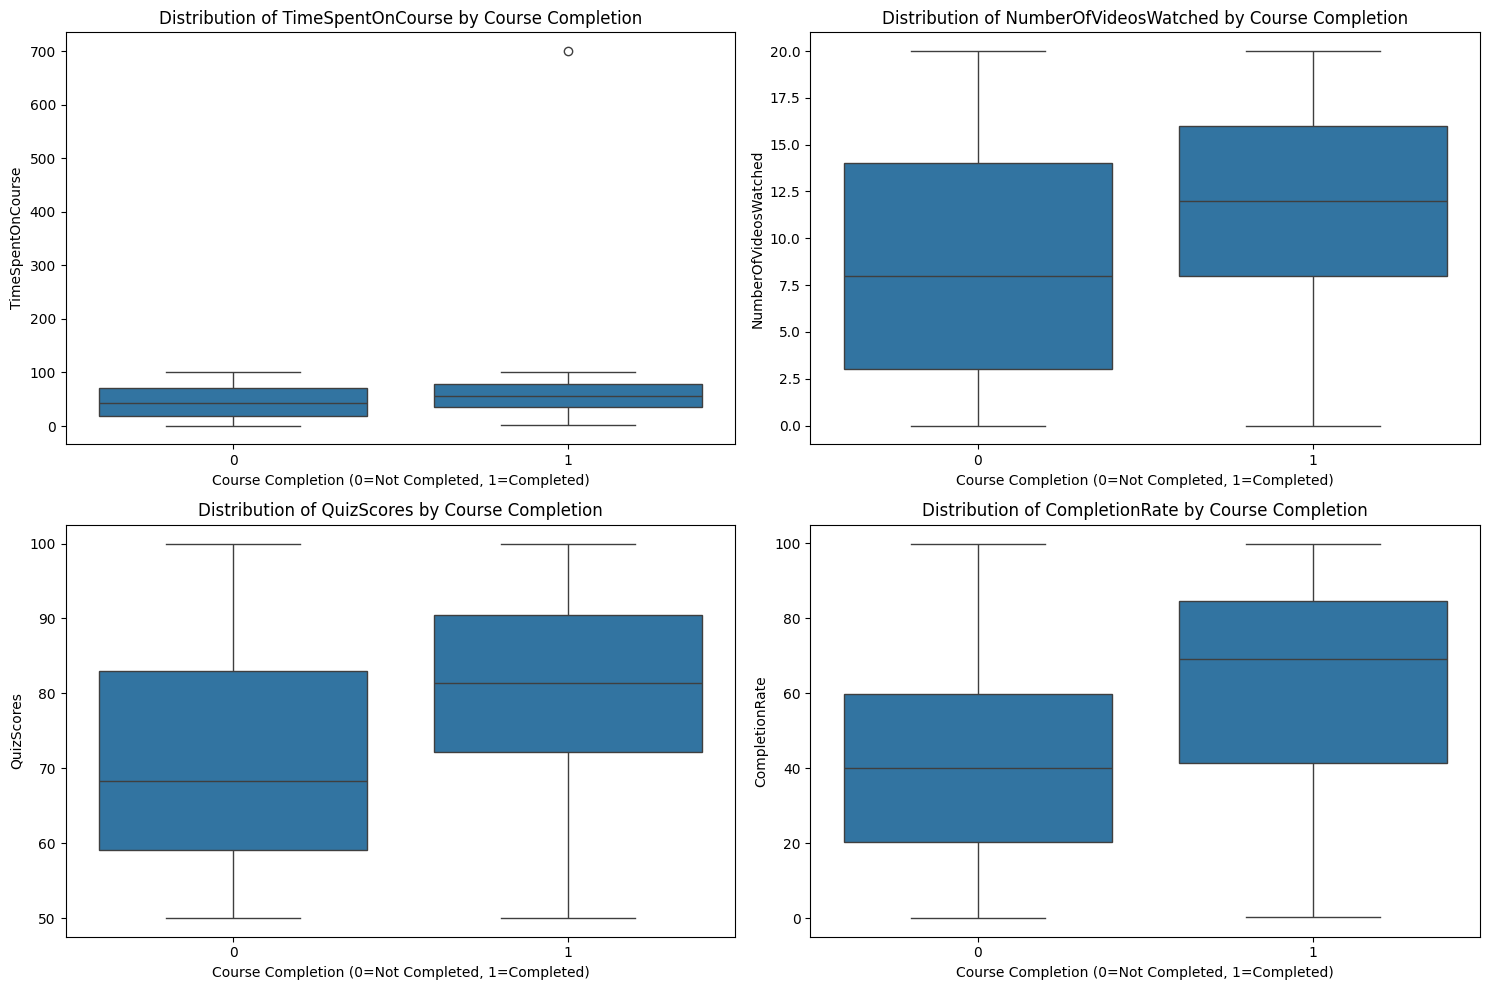

In [ ]:
# 4.1 رسم بياني يوضح الفرق في بعض المتغيرات الرئيسية بين المكتملين وغير المكتملين
variables_to_compare = ['TimeSpentOnCourse', 'NumberOfVideosWatched', 'QuizScores', 'CompletionRate']
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables_to_compare, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=target_col, y=var, data=df)
    plt.title(f'Distribution of {var} by Course Completion')
    plt.xlabel('Course Completion (0=Not Completed, 1=Completed)')

plt.tight_layout()
plt.show()

In [ ]:
#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
# تحويل الأعمدة الفئوية إلى أرقام (مثل CourseCategory)
df_model['CourseCategory'] = LabelEncoder().fit_transform(df_model['CourseCategory'])

In [ ]:
# تقسيم البيانات: X = المدخلات، y = الهدف
X = df_model.drop(columns='CourseCompletion')
y = df_model['CourseCompletion']

In [ ]:
# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# مقياس للتوحيد (مهم لبعض النماذج مثل SVM أو KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    cv = cross_val_score(model, X_train_scaled, y_train, cv=5).mean()
    print(f"🔹 {name} - Accuracy: {acc:.3f} | Cross-val: {cv:.3f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

🔹 Logistic Regression - Accuracy: 0.765 | Cross-val: 0.798
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       909
           1       0.73      0.75      0.74       712

    accuracy                           0.76      1621
   macro avg       0.76      0.76      0.76      1621
weighted avg       0.77      0.76      0.77      1621

--------------------------------------------------
🔹 Random Forest - Accuracy: 0.959 | Cross-val: 0.956
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       909
           1       0.97      0.94      0.95       712

    accuracy                           0.96      1621
   macro avg       0.96      0.96      0.96      1621
weighted avg       0.96      0.96      0.96      1621

--------------------------------------------------
🔹 SVM - Accuracy: 0.862 | Cross-val: 0.873
              precision    recall  f1-score   support

           0       0.86      0.90 

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train)

RandomForestClassifier()

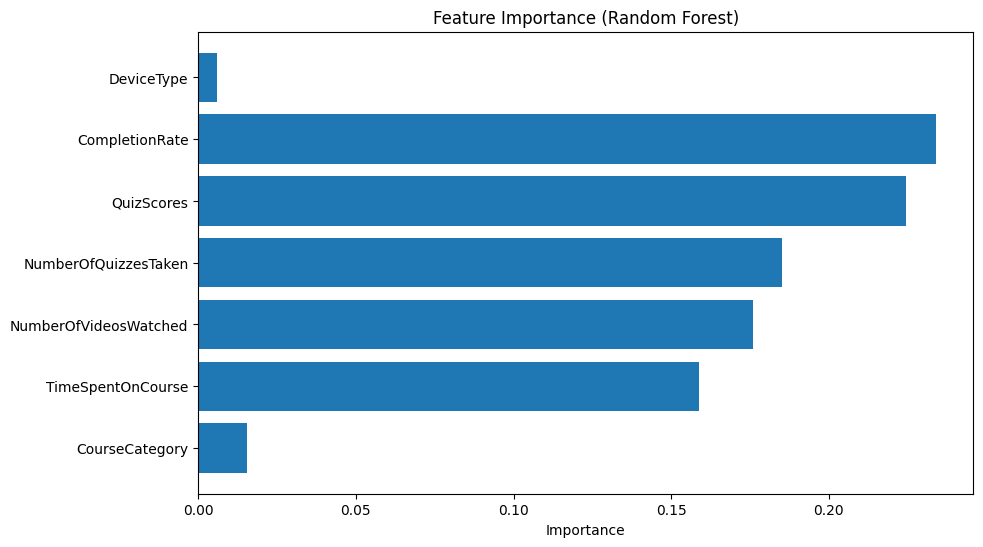

In [ ]:
# رسم أهمية الخصائص
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.show()